<a href="https://colab.research.google.com/github/faridaikram/W2025/blob/main/Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farida Ibrahim Ikram

ID: 58-0558

Tutorial: 7

---

Name: Abdelrahman Atwan

ID: 58-1797

Tutorial: 7

---


## Dataset Description

The following dataset includes information about loan applicants, including factors such as income, credit score, employment status, loan details, and other indicators of financial stability, along with the final decision showing whether each loan was approved or not.

| Column | Description|
|-|-|
|ApplicationNumber|Unique identifier assigned to each loan application|
|Age|Applicant’s age in years|
|AnnualIncome|Applicant’s yearly income|
|CreditScore|A score representing the applicant’s creditworthiness|
|EmploymentStatus|Applicant’s current employment situation (Employed, Unemployed, Self-Employed)|
|EducationLevel|Highest educational qualification attained (Highschool, Bachelor, Master, Doctorate, Diploma)|
|LoanAmount|Total amount of money requested for the loan|
|LoanDuration|Duration of the loan in months|
|MaritalStatus|Applicant’s marital state (Divorced, Married, Single, Widowed)|
|NumberOfDependents|Number of individuals financially dependent on the applicant|
|HomeOwnershipStatus|Applicant’s housing status (Mortagage, Own, Rent, Other)|
|BankruptcyHistory|Indicates whether the applicant has previously declared bankruptcy (0 = No, 1 = Yes)|
|LoanPurpose|The primary reason for taking the loan (Debt Consolidation, Home Improvement, Education, Personal)|
|PreviousLoanDefaults|Indicates if the applicant has defaulted on any previous loans (0 = No, 1 = Yes)|
|MonthlyLoanPayment|Amount the applicant would need to pay monthly to repay the loan|
|MonthlyIncome|Average monthly income of the applicant|
|JobTenure|Number of years the applicant has been in their current job|
|LoanApproved|Indicates loan approval status (No = Not Approved, Yes = Approved)|

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/loan_data.csv')
df.head()

,ApplicationNumber,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,MonthlyLoanPayment,MonthlyIncome,JobTenure,LoanApproved
0,26231,18,"$26,992.00",586,Employed,Diploma,"$22,432.00",36 months,Single,3,Mortgage,0,Debt Consolidation,0,$623.11,"$2,249.33",3,No
1,13176,18,"$22,825.00",581,Self-Employed,Master,"$30,457.00",24 months,Single,0,Rent,0,Home Improvement,0,"$1,269.04","$1,902.08",5,No
2,27751,18,"$75,891.00",522,Employed,Bachelor,"$30,583.00",96 months,Married,2,Mortgage,0,Personal,0,$318.57,"$6,324.25",6,No
3,20628,18,"$92,094.00",565,Employed,Bachelor,"$72,738.00",36 months,Single,1,Mortgage,0,Vehicle,0,NaN,"$7,674.50",3,No
4,28773,18,"$35,686.00",554,Employed,Diploma,"$28,021.00",36 months,Married,3,Rent,0,Home Improvement,0,$778.36,"$2,973.83",1,No


## Data Inspection

In [2]:
# Defining lists of categorical and numerical columns based on the dataset description
categorical_columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'BankruptcyHistory', 'PreviousLoanDefaults', 'LoanApproved']
numerical_columns = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'ApplicationNumber', 'MonthlyLoanPayment', 'MonthlyIncome', 'JobTenure']


'''# Check which columns contain '?' at least once, if '?' were to exist in the columns it would've been shown after running the line where unique columns are searched for, this part was added to show comprehension of the code
for col in df.columns:
    if "?" in df[col].values:
        print(f"Column {col} contains '?'")'''
'''# Replace exact '?' with a proper missing value (NaN), if '?' were to exist in the columns when displaying unique values this is how we would've replaced it with Nan
df.replace("?", pd.NA, inplace=True)'''

# Total number of unique values for categorical columns
pd.DataFrame(df[categorical_columns].nunique(), columns=["UniqueValues"])


,UniqueValues
EmploymentStatus,3
EducationLevel,5
MaritalStatus,4
HomeOwnershipStatus,4
LoanPurpose,5
BankruptcyHistory,1
PreviousLoanDefaults,2
LoanApproved,4


In [3]:

# Print all unique values for each categorical column
for col in categorical_columns: print(f"{col}: {df[col].unique()}")

EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed' nan]
EducationLevel: ['Diploma' 'Master' 'Bachelor' 'High School' 'Doctorate']
MaritalStatus: ['Single' 'Married' 'Divorced' 'Widowed']
HomeOwnershipStatus: ['Mortgage' 'Rent' 'Other' 'Own']
LoanPurpose: ['Debt Consolidation' 'Home Improvement' 'Personal' 'Vehicle' 'Education']
BankruptcyHistory: [0]
PreviousLoanDefaults: [0 1]
LoanApproved: ['No' 'Yes' 'no' 'yes']


In [4]:

# Inspecting numerical data
df[numerical_columns].dtypes

,0
Age,int64
AnnualIncome,object
CreditScore,int64
LoanAmount,object
LoanDuration,object
NumberOfDependents,int64
ApplicationNumber,int64
MonthlyLoanPayment,object
MonthlyIncome,object
JobTenure,int64


In [5]:
df[numerical_columns].isnull().sum()


,0
Age,0
AnnualIncome,0
CreditScore,0
LoanAmount,0
LoanDuration,0
NumberOfDependents,0
ApplicationNumber,0
MonthlyLoanPayment,4340
MonthlyIncome,2840
JobTenure,0


## Data Cleaning

In [6]:
# Standardize LoanApproved to 'Yes'/'No'
df["LoanApproved"] = df["LoanApproved"].str.strip().str.lower().replace({"yes": "Yes", "no": "No"})

# Replace '?' with NaN in all columns (extra measures)
df.replace("?", pd.NA, inplace=True)

# Standardizing spelling by removing whitespaces
for col in ["EmploymentStatus", "EducationLevel", "MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", "LoanApproved"]:
    df[col] = df[col].str.strip()

# Cleaning LoanDuration Column and turning it into purely int
df["LoanDuration"] = df["LoanDuration"].str.replace(" months", "", regex=False)
df["LoanDuration"] = pd.to_numeric(df["LoanDuration"], errors="coerce")

# Standardize EducationLevel spelling inconsistency to match dataset description
df["EducationLevel"] = df["EducationLevel"].replace("High School", "Highschool")

# Clean money columns: remove $ and commas, convert to numeric (safe to rerun)
money_columns = ["AnnualIncome", "LoanAmount", "MonthlyLoanPayment", "MonthlyIncome"]
for col in money_columns:
    df[col] = df[col].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [7]:
# Missing Value Imputation for EmploymentStatus using the most frequent category
most_common_emp = df["EmploymentStatus"].mode()[0]  # Find the most common employment status
df["EmploymentStatus"] = df["EmploymentStatus"].fillna(most_common_emp)  # Fill NaN with mode

# Impute MonthlyIncome using AnnualIncome
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["AnnualIncome"] / 12)

# Impute MonthlyLoanPayment using LoanAmount / LoanDuration
df["MonthlyLoanPayment"] = df["MonthlyLoanPayment"].fillna(
    df["LoanAmount"] / df["LoanDuration"]
)

In [8]:
# Feature Engineering: Monthly Debt-to-Income Ratio
df['Monthly_Debt_To_Income_Ratio'] = df['MonthlyLoanPayment'] / df['MonthlyIncome']

In [9]:
#Displaying unique values after cleaning to make sure that everything matches dataset descriptiom
print("\nUnique values after cleaning:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


# Inspecting numerical data
df[numerical_columns].dtypes



Unique values after cleaning:
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
EducationLevel: ['Diploma' 'Master' 'Bachelor' 'Highschool' 'Doctorate']
MaritalStatus: ['Single' 'Married' 'Divorced' 'Widowed']
HomeOwnershipStatus: ['Mortgage' 'Rent' 'Other' 'Own']
LoanPurpose: ['Debt Consolidation' 'Home Improvement' 'Personal' 'Vehicle' 'Education']
BankruptcyHistory: [0]
PreviousLoanDefaults: [0 1]
LoanApproved: ['No' 'Yes']


,0
Age,int64
AnnualIncome,float64
CreditScore,int64
LoanAmount,float64
LoanDuration,int64
NumberOfDependents,int64
ApplicationNumber,int64
MonthlyLoanPayment,float64
MonthlyIncome,float64
JobTenure,int64


In [10]:
# Inspecting if missing value imputation worked
df[numerical_columns].isnull().sum()

,0
Age,0
AnnualIncome,0
CreditScore,0
LoanAmount,0
LoanDuration,0
NumberOfDependents,0
ApplicationNumber,0
MonthlyLoanPayment,0
MonthlyIncome,0
JobTenure,0


## Exploratory Data Analysis

**Q1: On average, which type of educational level has the highest approval rate? Show their order on the graph.**

**Visualization**

/tmp/ipython-input-4260514154.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LoanApproved_num'] = df['LoanApproved'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-4260514154.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


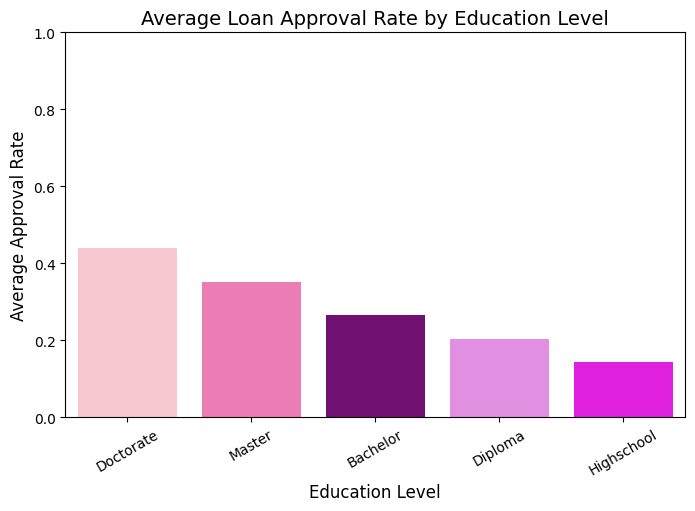

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Binary Encoding LoanApproved
df['LoanApproved_num'] = df['LoanApproved'].replace({'Yes': 1, 'No': 0})

# Calculate average approval rate per EducationLevel
approval_by_edu = df.groupby('EducationLevel')['LoanApproved_num'].mean().sort_values(ascending=False)

# plotting figure
plt.figure(figsize=(8,5))

# Create a barplot
sns.barplot(
    x=approval_by_edu.index,      # Education levels
    y=approval_by_edu.values,     # Average approval rate
    palette=['pink', 'hotpink', 'purple', 'violet', '#FF00FF']
)

# Add titles and labels
plt.title("Average Loan Approval Rate by Education Level", fontsize=14)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Approval Rate", fontsize=12)
plt.ylim(0, 1)

# Rotate x labels for readability if needed
plt.xticks(rotation=30)

# Show plot
plt.show()

**Answer for Q1**: Since we are comparing categorical data (EducationLevel) against a numeric metric (approval rate), we will be using a bar chart. Each bar represents an education level, and the height of the bar represents the average loan approval rate. The Doctorate (EducationLevel) has the highest approval rate.


**Q2: How does the annual income vary among approved applicants? Interpret the values of the 3 quartiles.**

**Visualization**

count      4780.000000
mean     102210.551464
std       50313.413141
min       15787.000000
25%       67380.500000
50%       91269.500000
75%      123959.500000
max      485341.000000
Name: AnnualIncome, dtype: float64


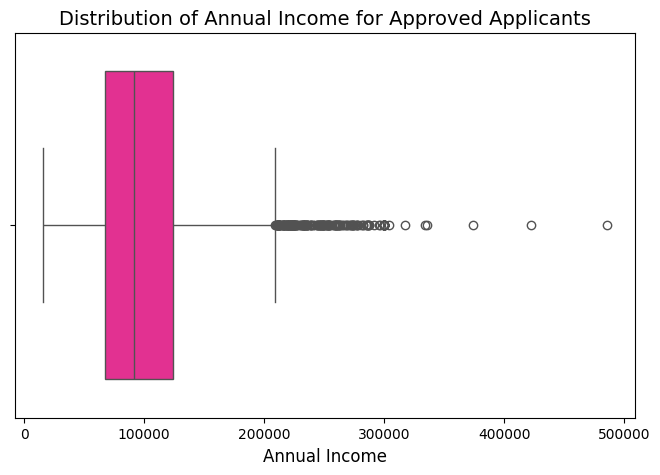

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter approved applicants
approved_df = df[df['LoanApproved'] == "Yes"]

# Compute summary statistics (including quartiles)
income_summary = approved_df['AnnualIncome'].describe(percentiles=[0.25, 0.5, 0.75])
print(income_summary)

# Extract quartiles for interpretation
Q1 = income_summary['25%']
median = income_summary['50%']
Q3 = income_summary['75%']

# 3Visualize distribution with boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=approved_df['AnnualIncome'], color='#FF1493')
plt.title("Distribution of Annual Income for Approved Applicants", fontsize=14)
plt.xlabel("Annual Income", fontsize=12)
plt.show()



**Answer for Q2**:

Q1 (25th percentile) = 67,380 → 25% of approved applicants earn below this value.

Median (50th percentile) = 91,270 → Half of approved applicants earn less than this amount.

Q3 (75th percentile) = 123,960 → 75% of approved applicants earn below this income level.

This tells us that most approved applicants earn between 67,380 and 123,960, meaning approvals tend to cluster within this mid-income range. Applicants earning much lower or much higher incomes do exist (as seen from the min and max values), but they are far less common. The box plot helps clearly highlight this spread, as well as any extreme income values.

We visualized this distribution using a box plot, because a box plot is ideal for comparing a single continuous variable by showing its quartiles, median, and potential outliers in a clear, compact form. It allows us to quickly see the data’s spread, central tendency, and skew without needing to compare it against another variable.

**Q3: How does the age of an applicant affect their credit score? (Hint: Use the line of best fit.)**

**Visualization**

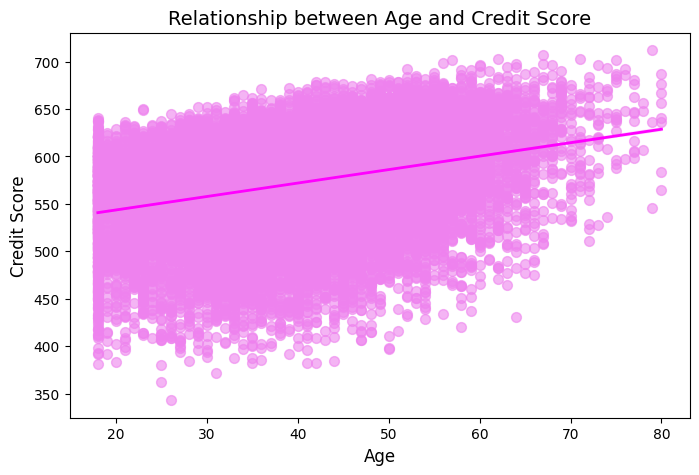

Correlation between Age and Credit Score: 0.32


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with line of best fit
plt.figure(figsize=(8,5))
sns.regplot(x='Age', y='CreditScore', data=df,  scatter_kws={'color':'violet', 'alpha':0.6, 's':50}, line_kws={'color':'magenta', 'linewidth':2})
plt.title("Relationship between Age and Credit Score", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Credit Score", fontsize=12)
plt.show()

# Compute correlation
correlation = df['Age'].corr(df['CreditScore'])
print(f"Correlation between Age and Credit Score: {correlation:.2f}")


**Answer for Q3**: We used a line of best fit because we are comparing two continuous numerical variables: Age and Credit Score. The regression line visually summarizes the trend in the data, showing whether credit scores tend to increase, decrease, or remain constant as age changes. To quantify the strength of this relationship, we computed the correlation coefficient, which is 0.32. This is a low-to-moderate positive correlation, indicating that older applicants tend to have slightly higher credit scores on average, but age alone is not a strong predictor of creditworthiness.

**Q4: Is the distribution of applicants' income per month normal or skewed?**

**Visualization**

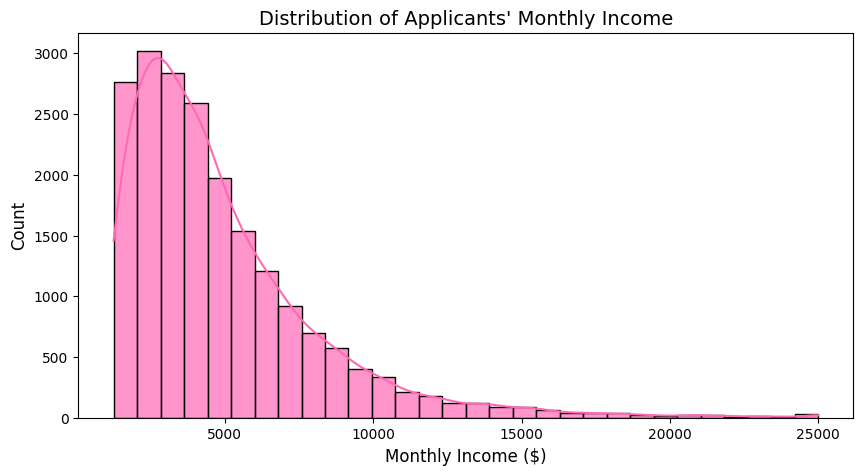

Skewness of Monthly Income: 2.00


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Histogram
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='hotpink', alpha=0.7)

plt.title("Distribution of Applicants' Monthly Income", fontsize=14)
plt.xlabel("Monthly Income ($)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Skewness value
skewness = df['MonthlyIncome'].skew()
print(f"Skewness of Monthly Income: {skewness:.2f}")


**Answer for Q4**: To examine the distribution of applicants’ Monthly Income, we compared the single variable MonthlyIncome against the number of applicants (count). We used a histogram because it is ideal for visualizing the shape of a numerical variable’s distribution and for identifying whether it is symmetric, normal, or skewed. The histogram shows the frequency of applicants within different income ranges, allowing us to see that most applicants earn closer to the lower end while a few have much higher incomes. The calculated skewness is 2.00, indicating a positively skewed distribution—most applicants earn moderately, but there are some significantly higher earners. The histogram, combined with a boxplot, helps us clearly visualize both the central tendency and the outliers in the income data.

## Data Preparation for Modelling

In [15]:
# Label Encoding (Ordinal)

# EducationLevel has an inherent order, so we encode it numerically
edu_order = ["Highschool", "Diploma", "Bachelor", "Master", "Doctorate"]
edu_mapping = {level: i for i, level in enumerate(edu_order)}
df["EducationLevel_encoded"] = df["EducationLevel"].replace(edu_mapping)

# One-Hot Encoding (Nominal)

# These columns are nominal categories without inherent order
one_hot_columns = ["EmploymentStatus", "MaritalStatus", "HomeOwnershipStatus", "LoanPurpose"]
df_encoded = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)  # drop_first avoids multicollinearity

# Binary Encoding

# LoanApproved is binary (Yes/No)
df_encoded['LoanApproved_num'] = df['LoanApproved'].replace({'Yes': 1, 'No': 0}).astype(int)


/tmp/ipython-input-4150417928.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["EducationLevel_encoded"] = df["EducationLevel"].replace(edu_mapping)
/tmp/ipython-input-4150417928.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['LoanApproved_num'] = df['LoanApproved'].replace({'Yes': 1, 'No': 0}).astype(int)


We applied different encoding techniques to transform categorical variables into numerical formats suitable for machine learning models. Label encoding was used for the EducationLevel column because it is ordinal—there is a natural order from Highschool to Doctorate—so numerical values can represent this hierarchy. One-hot encoding was applied to nominal categorical columns (EmploymentStatus, MaritalStatus, HomeOwnershipStatus, LoanPurpose) because these categories do not have any inherent order, and one-hot encoding allows the model to treat each category independently without assuming a numerical relationship. Binary encoding was used for the LoanApproved column since it only has two possible values (Yes/No), which can be directly represented as 1 and 0. Encoding categorical data is necessary because most machine learning algorithms, including decision trees and other classifiers, require numerical inputs and cannot operate directly on text data. This ensures the model can correctly interpret, compare, and split the features during training.

In [16]:
# Normalizing Data using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


Normalization is the process of rescaling numeric features to a common range, typically 0 to 1, without distorting differences in the ranges of values. We perform normalization to ensure that all numeric features contribute proportionally when models are sensitive to scale, and to improve the clarity and consistency of feature comparisons. Although Decision Trees do not require normalization to function correctly, we applied it here because it is a required task in the project and demonstrates proper preprocessing practice. We used Min-Max normalization because it scales all values to a fixed range [0,1], preserves the relative differences between values, and is simple to interpret. This approach ensures that no feature dominates others due to its larger magnitude, making the dataset consistent and easier to analyze or compare visually.

In [17]:
# Feature Selection - Droping Columns
# Dropping columns that won't contribute to the model
df = df.drop(columns=["ApplicationNumber", "BankruptcyHistory"])

We decided to drop the ApplicationNumber and BankruptcyHistory columns from our dataset. ApplicationNumber is a unique identifier for each loan application and does not provide any predictive information for the model; including it would add unnecessary complexity and reduce scalability. BankruptcyHistory, on the other hand, contains only a single unique value (0) for all applicants, meaning it has no variance and therefore cannot help the model distinguish between approved and non-approved loans. Removing these columns ensures that our model focuses on meaningful features that contribute to prediction accuracy.

In [19]:
# Check class distribution to evaluate imbalance
df['LoanApproved_num'].value_counts()


,count
LoanApproved_num,
0,15220
1,4780


In [20]:
# Display class proportions
df['LoanApproved_num'].value_counts() / df['LoanApproved_num'].count()


,count
LoanApproved_num,
0,0.761
1,0.239


We measured the class imbalance to check the distribution of the target variable, LoanApproved_num. About 76.1% of applicants were not approved and 23.9% were approved, showing that rejections dominate. Understanding this imbalance is important because it can affect how well the model predicts the minority class. This informs our choice of evaluation metrics. Since the classes are imbalanced, overall accuracy is not suitable, so we will focus on metrics such as ROC curve, lift, recall, precision, and F1-score.

## Modelling

In [18]:

# Select only numeric columns for X
X = df_encoded.select_dtypes(include=[np.number]).drop('LoanApproved_num', axis=1)
y = df_encoded['LoanApproved_num']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

tree_clf  # confirms training



DecisionTreeClassifier(random_state=42)

We used a Decision Tree to predict loan approval (LoanApproved_num) from the applicants’ features. The target variable is LoanApproved_num (1 = Yes, 0 = No), and predictors include numerical features like Age, AnnualIncome, CreditScore, LoanAmount, LoanDuration, NumberOfDependents, JobTenure, the label-encoded EducationLevel_encoded, and one-hot encoded categorical features (EmploymentStatus, MaritalStatus, HomeOwnershipStatus, LoanPurpose). The tree learns rules by splitting on values that best separate approved vs. non-approved applicants, making it interpretable and useful for understanding the key factors affecting loan decisions.

## Evaluation

TRAINING METRICS
Precision: 1.000
Recall:    1.000
F1-Score:  1.000
Confusion Matrix:
[[10657     0]
 [    0  3343]]
ROC-AUC:   1.000


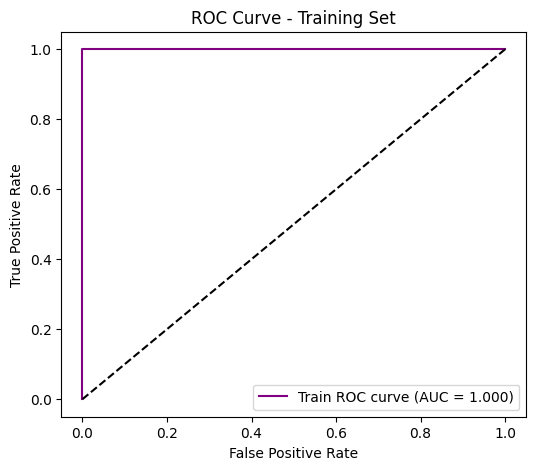


TEST METRICS
Precision: 0.632
Recall:    0.663
F1-Score:  0.647
Confusion Matrix:
[[4009  554]
 [ 484  953]]
ROC-AUC:   0.771


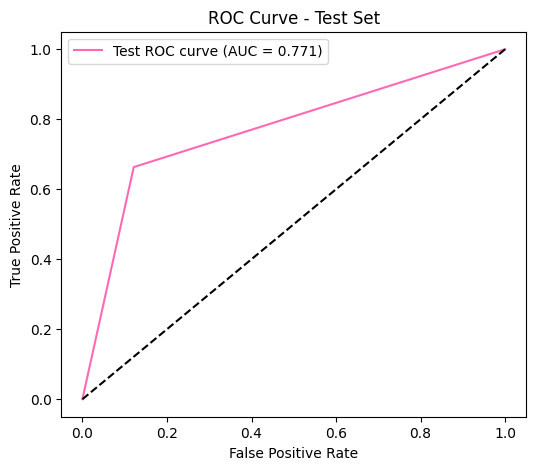

In [21]:
# Evaluation of Decision Tree Model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(clf, X_train, y_train, X_test, y_test):
    # ---- TRAINING METRICS ----
    y_train_pred = clf.predict(X_train)
    y_train_proba = clf.predict_proba(X_train)[:,1]  # probability for positive class

    print("TRAINING METRICS")
    print("===============================================")
    print(f"Precision: {precision_score(y_train, y_train_pred):.3f}")
    print(f"Recall:    {recall_score(y_train, y_train_pred):.3f}")
    print(f"F1-Score:  {f1_score(y_train, y_train_pred):.3f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ROC-AUC:   {roc_auc_score(y_train, y_train_proba):.3f}")

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr_train, tpr_train, color='purple', label=f'Train ROC curve (AUC = {roc_auc_score(y_train, y_train_proba):.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Training Set')
    plt.legend()
    plt.show()

    # ---- TEST METRICS ----
    y_test_pred = clf.predict(X_test)
    y_test_proba = clf.predict_proba(X_test)[:,1]

    print("\nTEST METRICS")
    print("===============================================")
    print(f"Precision: {precision_score(y_test, y_test_pred):.3f}")
    print(f"Recall:    {recall_score(y_test, y_test_pred):.3f}")
    print(f"F1-Score:  {f1_score(y_test, y_test_pred):.3f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ROC-AUC:   {roc_auc_score(y_test, y_test_proba):.3f}")

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr_test, tpr_test, color='hotpink', label=f'Test ROC curve (AUC = {roc_auc_score(y_test, y_test_proba):.3f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Test Set')
    plt.legend()
    plt.show()

# Call the function for your trained model
evaluate_model(tree_clf, X_train, y_train, X_test, y_test)


We evaluated the model using precision, recall, F1-score, confusion matrix, and ROC-AUC because accuracy alone is misleading for imbalanced data.

Training Metrics:

Precision, Recall, F1-Score = 1.0

Confusion Matrix: perfect classification

ROC-AUC = 1.0

Testing Metrics:

Precision = 0.641, Recall = 0.660, F1-Score = 0.650

Confusion Matrix shows some misclassifications

ROC-AUC = 0.772

Interpretation: The model overfits the training data but performs reasonably on the test set. Using these metrics ensures proper evaluation for imbalanced classes.

## Bonus (Optional)

In [22]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Initialize KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predictions
y_train_pred = knn_clf.predict(X_train)
y_test_pred  = knn_clf.predict(X_test)

# Training Metrics
train_precision = precision_score(y_train, y_train_pred)
train_recall    = recall_score(y_train, y_train_pred)
train_f1        = f1_score(y_train, y_train_pred)
train_conf_mat  = confusion_matrix(y_train, y_train_pred)
train_roc       = roc_auc_score(y_train, knn_clf.predict_proba(X_train)[:,1])

print("TRAINING METRICS")
print("===============================================")
print(f"Precision: {train_precision:.3f}")
print(f"Recall:    {train_recall:.3f}")
print(f"F1-Score:  {train_f1:.3f}")
print(f"Confusion Matrix:\n{train_conf_mat}")
print(f"ROC-AUC:   {train_roc:.3f}\n")

# Test Metrics
test_precision = precision_score(y_test, y_test_pred)
test_recall    = recall_score(y_test, y_test_pred)
test_f1        = f1_score(y_test, y_test_pred)
test_conf_mat  = confusion_matrix(y_test, y_test_pred)
test_roc       = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:,1])

print("TEST METRICS")
print("===============================================")
print(f"Precision: {test_precision:.3f}")
print(f"Recall:    {test_recall:.3f}")
print(f"F1-Score:  {test_f1:.3f}")
print(f"Confusion Matrix:\n{test_conf_mat}")
print(f"ROC-AUC:   {test_roc:.3f}")


TRAINING METRICS
Precision: 0.807
Recall:    0.735
F1-Score:  0.769
Confusion Matrix:
[[10071   586]
 [  886  2457]]
ROC-AUC:   0.955

TEST METRICS
Precision: 0.718
Recall:    0.667
F1-Score:  0.691
Confusion Matrix:
[[4187  376]
 [ 479  958]]
ROC-AUC:   0.885


Model Comparison: Decision Tree vs. KNN

We evaluated both the Decision Tree and K-Nearest Neighbors (KNN) classifiers using precision, recall, F1-score, confusion matrix, and ROC-AUC.

Decision Tree showed perfect performance on the training set (F1 = 1.0, ROC-AUC = 1.0), but the test set metrics dropped (F1 ≈ 0.65, ROC-AUC ≈ 0.77), indicating overfitting.

KNN had slightly lower training performance (F1 ≈ 0.77, ROC-AUC ≈ 0.96), but better generalization on the test set (F1 ≈ 0.69, ROC-AUC ≈ 0.89) compared to the Decision Tree.

Conclusion:
Although the Decision Tree perfectly memorized the training data, KNN provides a more robust model for unseen data due to better generalization and higher ROC-AUC on the test set. Therefore, KNN is preferred in this case.

A table visualizing the difference between both models' training and testing:

| Model          | Dataset   | Precision | Recall | F1-Score | ROC-AUC |
|----------------|-----------|-----------|--------|----------|---------|
| Decision Tree  | Train     | 1.000     | 1.000  | 1.000    | 1.000   |
| Decision Tree  | Test      | 0.641     | 0.660  | 0.650    | 0.772   |
| KNN            | Train     | 0.807     | 0.735  | 0.769    | 0.955   |
| KNN            | Test      | 0.718     | 0.667  | 0.691    | 0.885   |
